# Tenta 2020-06-05

## Part 1

### 1. Word count

Write a function that counts words in text and returns a dictionary which maps the word to the count number (int) of that word

* It should convert words to lower case
* Words should not have newlines
* Words should not contain separation characters like ", . ? !"

In [1]:
import collections

def word_count(text):
    """
    Calculates words in text, return type: dict
    
    >>> word_count('bye bye')
    {'bye': 2}
    >>> word_count('She loves me yeah yeah yeah')
    {'she': 1, 'loves': 1, 'me': 1, 'yeah': 3}
    """

In [2]:
from solutions import word_count
assert word_count('bye bye') == {'bye': 2}
assert word_count('She loves me yeah yeah yeah') == {'she': 1, 'loves': 1, 'me': 1, 'yeah': 3}
assert word_count('''
A word,
if you please!
''') == {'a': 1, 'word': 1, 'if': 1, 'you': 1, 'please': 1}
assert word_count("What?") == {'what': 1}

```{admonition} Solution
:class: dropdown
~~~
def word_count(text):
    """
    Calculates words in text, return type: dict
    
    >>> word_count('bye bye')
    {'bye': 2}
    >>> word_count('She loves me yeah yeah yeah')
    {'she': 1, 'loves': 1, 'me': 1, 'yeah': 3}
    """
    count = {}
    text = text.lower()
    for punctuation in ',.?!':
        text = text.replace(punctuation, ' ')
        
    for word in text.split():
        count[word] = count.get(word, 0) + 1
    return count
~~~
```

### 2. Pirate language translator
 
Double any consonant and put an o in between

~~~
>>> to_pirate('hello')
hohelollolo
~~~

The output should preserve leading upper case of the characters in the beginning of the sentance. See the tests below

In [3]:
VOWELS = 'eiyaou'
def to_pirate(text):
    """
    Double consonants in text inserting an "o" between

    >>> to_pirate("hello")
    hohelollolo
    """


In [4]:
from solutions import to_pirate
assert to_pirate('hello') == 'hohelollolo'
assert to_pirate('Hello there') == 'Hohelollolo tothoherore'

```{admonition} Solution
:class: dropdown
~~~
VOWELS = 'eiyaou'
def to_pirate(text):
    pirate = ""
    for char in text:
        # do not duplicae vowels and spaces
        if char not in VOWELS + " ":
            pirate += char + 'o' + char.lower()
        else:
            pirate += char
    return pirate
~~~
```

## Part 2

### 1. Classes
Define a class Circle that stores position in  the x-y plane and its radius

In [5]:
from pytest import approx
from math import pi

class Circle:
    # YOUR CODE HERE
    ...

Let the deault behaviour be a unit circle centered around origo

In [6]:
from solutions import Circle
circ = Circle()
assert circ.x == approx(0.0)
assert circ.y == approx(0.0)
assert circ.r == approx(1.0)

When we supply arguments to the class constructor the circle shape and position is saved

In [7]:
circ = Circle(r=2)
assert circ.x == approx(0.0)
assert circ.y == approx(0.0)
assert circ.r == approx(2.0)

circ = Circle(x=1, y=1)
assert circ.x == approx(1.0)
assert circ.y == approx(1.0)
assert circ.r == approx(1.0)

Add class methods for calculating the area and circumference

In [8]:
assert Circle().area() == approx(pi)
assert Circle().circumference() == approx(2*pi)

Define an overloading method such that we can compare two Circle objects, being equal if they have same radius and center. Use any comparison between floats with the pytest approx function

In [9]:
circ_a = Circle(x=1, y=2, r=3)
circ_b = Circle(x=1, y=2, r=3)
assert circ_a == circ_b

```{admonition} Solution
:class: dropdown
~~~
class Circle:
    def __init__(self, x=0.0, y=0.0, r=1.0):
        self.x = x
        self.y = y
        self.r = r
        
    def area(self):
        """
        Calculates and returns the circle area
        """
        return pi*self.r**2
    
    def circumference(self):
        """
        Calculates and returns circle circumference
        """
        return 2*pi*self.r

    # This defines the behaviour the equal sign '=' between two Circle objects
    def __eq__(self, other):
        """
        Two circles are considered equal if they have the same radius and center
        """
        return self.x == approx(other.x) and self.y == approx(other.y) and self.r == approx(other.r)
~~~
```

## Part 3

### 1. Decorator
Consider a mathematical function of a variable $f(x)$. The derivative of the function is a measure of change, illustrated by the slope of a tangent line at a point on the curve

For example given

$$ f(x) = x^2 $$

the derivative is

$$ f'(x) = 2x $$

which means that at e.g. $x_0=3$ a tangent to the curve has slope $f'(3) = 2*3=6$ and has the equation for a straight line

$$ y = f(x_0) + f'(x_0)(x-x_0)$$

In [10]:
import math

import matplotlib.pyplot as plt
import numpy as np

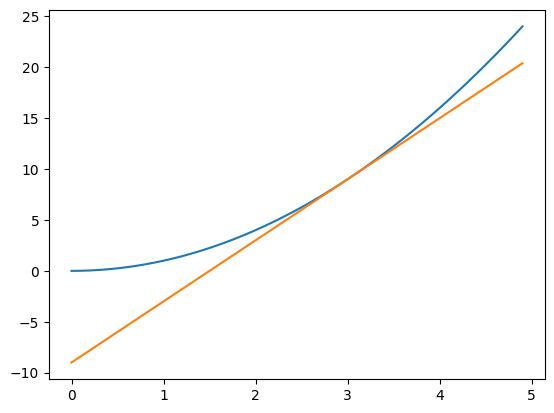

In [11]:
def f(x):
    return x**2

def fp(x):
    return 2*x

x = np.arange(0, 5, .1)
x0 = 3.0

plt.plot(x, f(x))
plt.plot(x, f(x0) + fp(x0)*(x-x0))

Mathematically derivatives are understood as the ratio of differences in y and x values close to a given point and taking the limit where the point get closer

$$ f'(x) \approx \frac{f(x + \delta) - f(x-\delta)}{2\delta} $$

For a small number $\delta$ this can be used as an approximation to the derivate for a function

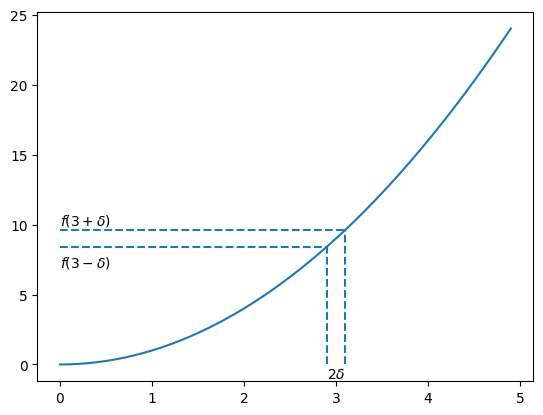

In [12]:
delta = 0.1

plt.vlines(x0-delta, 0, f(x0-delta), linestyle='dashed')
plt.vlines(x0+delta, 0, f(x0+delta), linestyle='dashed')
plt.hlines(f(x0-delta), 0, x0-delta, linestyle='dashed')
plt.hlines(f(x0+delta), 0, x0+delta, linestyle='dashed')

plt.text(2.9, -1, r'$2\delta$')
plt.text(0, 10, r'$f(3 + \delta)$')
plt.text(0, 7, r'$f(3 -\delta)$')


plt.plot(x, f(x))
#plt.plot(dx, f(dx))

#### Task

Write a decorator that implements the numerical approximattion to a derivative

The decorator applied to a library function, e.g. math.sin should then return a function for which approximately

    derivative(math.sin)(x) ≈ math.cos(x)

for most values of $x$

Likewise the decorator applied to a function definition with the @-syntax

~~~
@derivative
def f(x):
     return x**2
~~~

defines a function that satisfies

    f(x) ≈ 2*x
    
for most values of $x$

In [13]:
delta = 1e-8

# YOUR CODE HERE

In [14]:
from solutions import derivative
epsilon = 1e-6

@derivative
def f(x):
    return x**2

assert abs(f(3.0) - 6.0) < epsilon

In [15]:
assert abs(derivative(math.sin)(.5) - math.cos(.5)) < epsilon

```{admonition} Solution
:class: dropdown
~~~
delta = 1e-8
def derivative(f):
    
    def wrap(x):
        return (f(x + delta) - f(x-delta))/(2*delta)
  
    return wrap
~~~
```

### 2. Generator


This is a filter that returns lines of a file that have a length greader than maximum

If the content of a textfile `file.txt` is

~~~
hello 
you
merry
~~~

We except a function `find_long_lines` to behave like this

~~~
>>> for line in find_long_lines('file.txt', 3):
...    print(line)
hello
merry
~~~

Knowing that the return value of the function must be iterable to use in a for-loop. 
Implement this function as a generator.

The max_length should be without the final newline character `\n` of the line 

In [16]:
def find_long_lines(filename, max_length):
    """
    generator that extracts lines in filename that
    exceeds max_length
    """

In [17]:
%%file file.txt
hello
you
merry

Overwriting file.txt


In [18]:
from solutions import find_long_lines
assert list(find_long_lines('file.txt', 3)) == ['hello', 'merry']

```{admonition} Solution
:class: dropdown
~~~
def find_long_lines(filename, max_length):
    """
    generator that extracts lines in filename that
    exceeds max_length
    """
    for l in open(filename):
        line = l.strip()
        if len(line) >  max_length:
            yield line%        
~~~
```